# Mechanics Lab V -- Damped Harmonic Oscillator

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Simple harmonic oscillators and variations on them show up everywhere in physics. Today, you'll explore how the addition of damping effects harmonic motion.

## Objectives

In this lab you will learn about the behavior of and equations of motion for
* undamped
* overdamped
* critically damped
* and under damped oscillators.

## Harmonic Motion without Damping

Consider the mass-spring problem from intro physics:
$F = ma =-kx,$ so
$\frac{d^2x}{dt^2}=-\frac{k}{m}x,$
where the x values are functions of time.

### Analytical solution
Assume a solution $$x = Acos(\omega t) + Bsin(\omega t).$$ 

#### Exercise 5.1
On a separate piece of paper, do the algebra to find the analytic solution by plugging in your assumed solution (and its derivatives) into the differential equation and determine the value of $\omega$. 

Then make a Python plot of the analytical result for x(t) and v(t), assuming that $x_{0} = 3$m, $v_{0} = 1$m/s, $k = 8$N/m, and $m = 2$kg. See if you can show both x and v as different color lines on the same plot. Make the plot run for 10 seconds, with 10000 points.

Text(0.5, 1.0, 'position and velocity vs time')

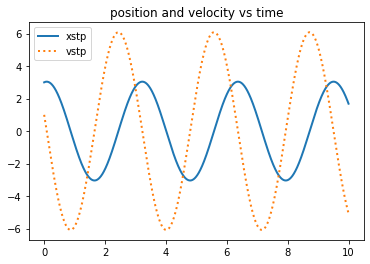

In [2]:
# <Exercise 5.1 Analytical solution, no damping>

xo = 3
vo = 1
k = 8
m = 2

w = sqrt(k/m)
acons = xo
bcons = vo/w

tstp = arange(0.0,10.0,0.001)
xstp = acons*cos(w*tstp)+bcons*sin(w*tstp)
vstp = -acons*w*sin(w*tstp)+bcons*w*cos(w*tstp)

figure()
plot(tstp, xstp, '-',label = "xstp", linewidth = 2)
plot(tstp, vstp, ':', label = 'vstp', linewidth = 2)
legend()
title('position and velocity vs time')







### Numerical solution
As usual, we convert this second-order equation into two coupled first order equations, really by defining a velocity function, which is itself a first derivative of the position function:

$$v = \frac{dx}{dt}.$$

Then we seek to solve simultaneous solutions to these two first-order equations:
$$v = \frac{dx}{dt},$$
$$\frac{dv}{dt} = -\frac{k}{m}x = -\omega_{0}^2 x.$$

Now for each moment in time we will get solutions for $x$ and for $v$, which we will store as the usual r-list for each time step.  Following the convention of Lab 3, we let r[0] be the x variable, and r[1] the velocity variable. 


#### Exercise 5.2

Calculate a numerical solution using ODEINT() for the same initial conditions of x0 = 3, v0 = 1. As before, generate a solution for 10 seconds, with 10000 points. Plot x(t) and v(t) as different color lines in the same figure.

*** Write your own solution, or fix this one: ***

Text(0.5, 1.0, 'numerical solution: position and velocity vs time')

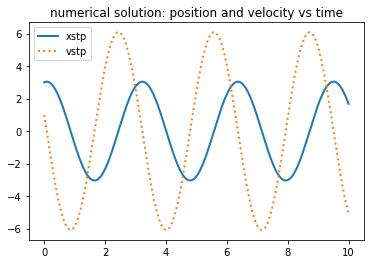

In [3]:
# <Exercise 4.2 numerical solution to SHO without damping>
from scipy.integrate import odeint  #the differential equation integrator  For usage, see scipy scipy.integrate

#global variables
k = 8.0
m = 2.0
omega0 = sqrt(k/m)  #fix


def deriv(r,t): 
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v #fix
    dvdt = -(omega0**2)*x #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,10.0,10000) #fix 
x0 = 3 #fix
v0 = 1 #fix
rinit = np.array([x0,v0])     #The two-element list that gives the initial position and velocity
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11)  #to maintain reasonable accuracy, we need
                                                    #to tighten these tolerances (compare error if 
                                                    #you omit these keywords)  If you are patient, you
                                                    #could set these to 1E-13 to reduce the residual
#### YOUR PLOT CODE HERE 
xtp = r[:,0]
vtp = r[:,1]

figure()
plot(t, xtp, '-',label = "xstp", linewidth = 2)
plot(t, vtp, ':', label = 'vstp', linewidth = 2)
legend()
title('numerical solution: position and velocity vs time')

#### Exercise 5.3
Check the accuracy of your code by comparing your numerical and analytic solutions. To do this, calculate the residual in position (x_numerical - x_analytic) and plot it as a function of time.

Text(0.5, 1.0, 'residule vs time')

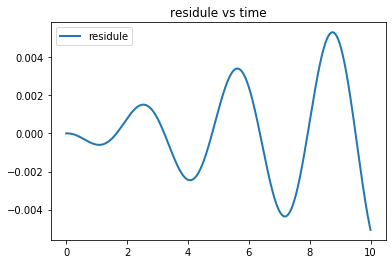

In [4]:
# <Exercise 5.3>
residule = xtp - xstp

figure()
plot(t, residule, '-',label = "residule", linewidth = 2)
legend()
title('residule vs time')

#### Exercise 5.4
Use your numerical solution to make a plot showing KE, PE, and total E vs. time. Just for fun, make a second plot showing velocity vs. position (a phase/state space plot). Are these two plots what you would expect? Explain ***here***.



For the figure one. We expect mechanical energy and kinetic energy completely out of phase. The sum of kinetic energy and potential energy is the total energy. 

For the figure two, we expect that the graph is a ellipse, because $ x = A\cos(wt)+B\sin(wt)$ and $\dot x = -Aw\sin(wt)+Bw\cos(wt)$. We find that if we eliminate parameter t by squring both equation, we get the equation for ellipse. 

















Text(0.5, 1.0, 'velocity vs position')

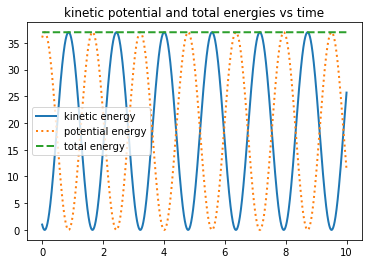

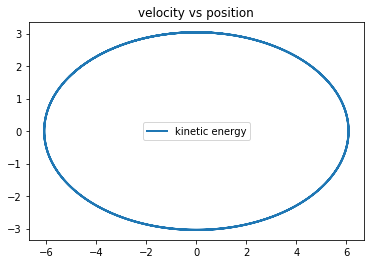

In [5]:
# <Exercise 5.4>

xtp = r[:,0]
vtp = r[:,1]
ke = m*vtp**2*0.5
pe = k*xtp**2*0.5
me = ke + pe

figure()
plot(t, ke, '-',label = "kinetic energy", linewidth = 2)
plot(t, pe, ':', label = 'potential energy', linewidth = 2)
plot(t, me, '--', label = 'total energy', linewidth = 2)
legend()
title('kinetic potential and total energies vs time')

figure()
plot(vtp, xtp, '-',label = "kinetic energy", linewidth = 2)
legend()
title('velocity vs position')

## Damped Harmonic Oscillator

The damped harmonic oscillator is most easily modeled as a velocity-dependent drag force of the form $$F_{damp} = -b  \dot x(t),$$ which means that our equations of motion now look like:
$$F = ma =-kx - b \dot x,$$ so

$$\frac {d^2x} {dt^2}=-\frac{k}{m}x -\frac {b}{m} \dot x.$$

We saw earlier that a viscous damping force gave exponentially decaying solutions.  Here we expect some combination of exponentially decaying and oscillating solutions.  

But first, anticipating Taylor's notation, we define a new variable $\beta = \frac{b}{2m}$, and we can substitute the undamped natural frequency $\omega_{0}^2 = \frac{k}{m}$ so that 

$$\ddot x+ 2\beta \dot x +\omega_{0}^2 x = 0.$$

Now given Euler's theorem, $e^{it} $= cos($t$)+isin($t$), we may compactly write solutions in the form:
$$x(t) = e^{r t}.$$



#### Exercise 5.5  
On a separate sheet of paper, substitute this trial solution, and solve (analytically) the resulting quadratic equation, yielding a pair of solutions:

$$r_{\pm} = -\beta \pm \sqrt{{\beta}^2-\omega_{0}^2} .$$

The complete solution can then be found by matching initial conditions in the form

$$x(t) = C_{1}e^{r_{+}t} + C_{2}e^{r_{-}t}.$$

We will now consider the four cases 4 cases of no damping, large damping, critical damping, and small damping.


### 1) No damping, $\beta = 0.$
#### Exercise 5.6

On a separate sheet of paper, show that setting $\beta = 0$ is identical to the undamped case, recalling that $\sqrt{-1} = i$.

You should already have plotted this case above. For completeness, though, edit the code below to numerically solved the damped driven oscillator for a given value of $\beta$, and then set the value of $\beta$ to zero.  In later sections, you will change the value of $\beta$ so make sure your deriv function is set-up correctly. Run your solution from t = 0 to t = 40 with 10,000 steps, but keep the same initial conditions and values for k and m.
Plot x(t) and v(t) on the same figure using different line colors. It will also be handy for you to save a copy of x(t) for comparison with the other cases, so include the following line at the end of your code to save your solution:

         undamped_xsolution = r[:,0]
         
You'll notice that now there is an extra argument in the deriv function, *param,* and an extra argument in the odeint function call, *args=(param,)*. Including *args=(param,)* in the odeint function call allows us to pass an extra variable to the deriv function. *param* is an array of the necessary extra parameters for the equations of motion, which in this case consists of the damping parameter, $\beta$. The advantage of setting up the odeint/deriv functions in this way is that it will allow you to easily modify the value of $\beta$.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


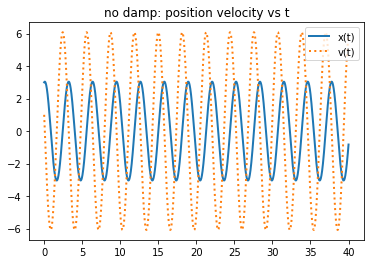

In [6]:
# <Exercise 5.6 No damping> 

#### Edit the code below

#global variables
k = 8.0
m = 2.0
omega0 = sqrt(k/m)  #fix

def deriv(r,t,param): 
    #unpack the parameters (in this case, just the damping parameter)
    beta = param[0]
    #unpack the variables
    x = r[0]
    v = r[1]
    #perform the derivatives
    dxdt = v  #fix
    dvdt = -2*beta*v-omega0**2*x  #fix
    return array([dxdt,dvdt],float)

t = np.linspace(0.0,40.0,1e4) #fix 
beta_damp = 0.0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,)) # Including the param array in the arguments we pass

x_undam = r[:,0]                                                              # to odeint
v_undam = r[:,1]

#### CODE TO PLOT x(t) AND v(t) HERE

figure()
plot(t, x_undam, '-',label = "x(t)", linewidth = 2)
plot(t, v_undam, ':', label = 'v(t)', linewidth = 2)
legend()
title('no damp: position velocity vs t')

#### CODE TO SAVE SOLUTION HERE
x_undam = r[:,0]                                                              # to odeint
v_undam = r[:,1]   


### 2) Large damping, ${\beta}^2 > \omega_{0}^2.$ 

We call this the *overdamped* case, and it has exponetially decaying solutions.  For example, when you opened the door to this room, you had to do work against a door-closing spring.  When you let go, though, a pneumatic or hydraulic soft-closing mechanism makes the door overdamped up until the moment that it needs to latch shut, whereupon the damping is suddenly reduced to snap the door closed.  

Note that in the overdamped case you get two solutions as usual,

$$r_{\pm} = -\beta \pm \beta\sqrt{1-\Big(\frac{\omega_{0}}{\beta}\Big)^2}. $$

The overall shape will be determined by the ***more-slowly*** decaying exponential.

#### Exercise 5.7
For a concrete illustration of the overdamped case, let $\beta = 10\omega_{0}$ and numerically calculate and plot x(t) and v(t). Since you have already defined your time array and your deriv function in the cell above (and your initial conditions and values for k, m, and $\omega_0$ much earlier), you do not need to replicate that code. However, you will need to include a line of code to set $\beta$ and 

    param = np.array([beta_damp])
    r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,))
    
to numerically solve the equations of motion, in addition to writing code to plot x(t) and v(t).

Text(0.5, 1.0, 'large damp: position velocity vs t')

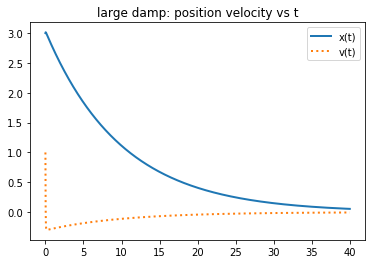

In [7]:
# <Exercise 5.7 Overdamping, beta_damp = 10*omega0>
x0 = 3 #fix
v0 = 1 #fix
rinit = np.array([x0,v0])

beta_damp = 10*omega0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,))

x_over = r[:,0]
v_over = r[:,1]

figure()
plot(t, x_over, '-',label = "x(t)", linewidth = 2)
plot(t, v_over, ':', label = 'v(t)', linewidth = 2)
legend()
title('large damp: position velocity vs t')


#### Exercise 5.8
On a separate sheet of paper, analytically calculate the time-scale over which the exponential decays, assuming $\beta = 10\omega_{0}$. To do this, note that $(\frac{\omega_0}{\beta})^2$ is << 1.  Taylor expand the square root in the expression for $r_{\pm}$ to first order around a = 1 at x = $1 - (\frac{\omega_0}{\beta})^2$.

Now compare the two solutions.  You'll see that one of them is much more highly damped than the other.  Assuming one of them dies off really quickly, the other one must determine the overall shape of x(t), that is, $r_{+}$ dominates.  Solve for the *time constant* $\tau$, which is the time that it takes a decaying exponential to fall to 1/e of its initial value. [ Hint:  it should be about 10 seconds--show this, and look for it on your plot above].

$\tau$ has units of seconds, and it is a measure of the time scale over which the amplitude falls off.   You encountered an identical term while discharging a capacitor through a resistor, where $Q(t) = Q_{0}e^-t/\tau$ represented the charge on the plates of the capacitor, and $\tau = RC$.

### 3) Critical damping, ${\beta}^2 = \omega_{0}^2.$

 This leads to a double root in the characteristic equation, which requires solutions of the form $$x(t)= Ae^{-\beta t} + Bte^{-\beta t}.$$  
 
This *critical damping* case and it is the quickest way to get an oscillator to shed its energy.  Car suspensions are designed to be close to critically-damped for the average passenger load.  

#### Exercise 5.9
Numerically calculate the solution to the critical damping case for the same initial conditions as before and plot x(t) and v(t). 

*** From your graph, about how long does it take for the amplitude to decrease by a factor of 1/e? ***
0.7200720072007201 s

the time it takes for the amplitude to decrease by a factor of 1/e is  0.7200720072007201


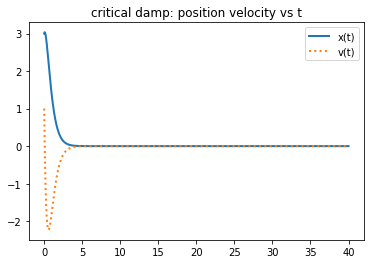

In [8]:
# <Exercise 5.9 Critical damping>

x0 = 3 #fix
v0 = 1 #fix
rinit = np.array([x0,v0])

beta_damp = 1*omega0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,))

x_cri = r[:,0]
v_cri = r[:,1]

figure()
plot(t, x_cri, '-',label = "x(t)", linewidth = 2)
plot(t, v_cri, ':', label = 'v(t)', linewidth = 2)
legend()
title('critical damp: position velocity vs t')

xti = x0-x0/e

tao = t[np.where(x_cri>xti)[0][-1]]

print("the time it takes for the amplitude to decrease by a factor of 1/e is ", tao)

Note that for the initial conditions, $x_{0}$ = 3m and $v_{0}$ = 1m/s, the oscillator starts at 3m and approaches x = 0, reaching it at t = $\infty$. For other cases, though, the oscillator may first overshoot, crossing through x = 0 and reapproacing it and reaching it at t = $\infty$. 

#### Exercise 5.10 
Find one possible pair of $A$ and $B$ for which the oscillator hits x = 0 before t =  $\infty$ and solve analytically for the time at which the oscillator will first hit x = 0. To check your calculations, numerically solve for and plot x(t) and v(t) given those initial conditions. Justify your solution ***here***. (Non-trivial solutions, please, so you are not allowed $A=0, B=0$).


for critical damping, $\beta = \omega$ we know $r=-\beta +- \sqrt{\beta^2-\omega^2}$. So $r=-\beta$. The general solution to the differential equation is $x(t)=(At+B)e^{-\beta t}$. We let $x(t)=0$. We get $t=-\frac{B}{A}$. So whenever A and B have different signs,  the oscillator hits x = 0 before t =  $\infty$

In the numerical solution, xo is -3 and x(40)is 5.286760313726153e-16. So x must have passed x=0. 

the time it takes for the amplitude to decrease by a factor of 1/e is  40.0
x0:-3.0
x40:5.286760313726153e-16


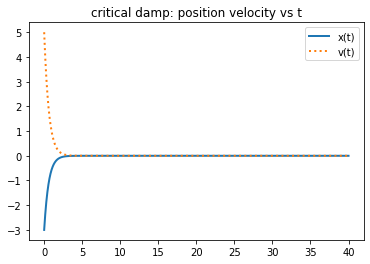

In [9]:
# <Exercise 4.10 Critical damping with zero-crossing>
# Redo your plot for critical damping, but now with the pair of A, B values that you listed in 4.3c


x0 = -3 #fix
v0 = 5 #fix
rinit = np.array([x0,v0])

beta_damp = 1*omega0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,))

x_cri = r[:,0]
v_cri = r[:,1]

figure()
plot(t, x_cri, '-',label = "x(t)", linewidth = 2)
plot(t, v_cri, ':', label = 'v(t)', linewidth = 2)
legend()
title('critical damp: position velocity vs t')

xti = x0-x0/e

tao = t[np.where(x_cri>xti)[0][-1]]

print("the time it takes for the amplitude to decrease by a factor of 1/e is ", tao)
print("x0:{}".format(x_cri[0]))
print("x40:{}".format(x_cri[-1]))

### 4) Underdamping, ${\beta}^2 < \omega_{0}^2.$

The small damping case is mathematically the most interesting, because the system oscillates and decays.  
The general result for real solutions can be matched to 

$$ x(t) = e^{-\beta t}(A cos(\omega_{d}t) + B sin(\omega_{d}t)),$$
with $A$ and $B$ real constants, chosen to fit the initial conditions.


#### Exercise 5.11
For a concrete illustration of the underdamped case, keep $\omega_{0} = 2$s$^{-1}$ and let  $\beta = \frac{\omega_{0}}{10}.$ On a seporate sheet of paper, calculate the time at which the amplitude will have fallen to its 1/e point, (roughly 1/3 of its initial amplitude). Calculate, as well, the frequency of the oscillations, $\omega_d$.


#### Exercise 5.12
Numerically calculate the solution to the underdamping case for x = 3m, v = 1m/s, $\omega_0$ = 2s$^{-1}$, and $\beta = \frac{\omega_0}{10}$. Plot x(t) and v(t). 

Justify that your plots match your results from Exercise 5.11 ***here***.

We have plotted the envolope of the ocssilator. We calculate the numerical value for the time to decay to a ratio of 1/e. The numerical value is 4.99 seconds which is very close to the analytical value of 5 seconds. 


the time it takes for the amplitude to decrease by a factor of 1/e is  4.9964996499649965


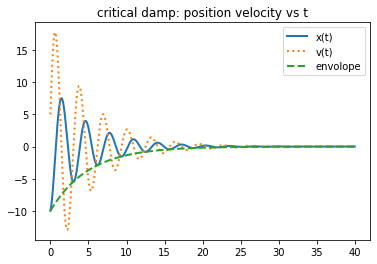

In [10]:
# <Exercise 4.12 Underdamping>

x0 = -10 #fix
v0 = 5 #fix
rinit = np.array([x0,v0])
omega0 = 2

beta_damp = 0.1*omega0 # The damping parameter. In later exercises, you will change this value
param = np.array([beta_damp]) # Same the damping parameter into the param array so that it can be passed to the deriv 
                            # function through odeint
r=odeint(deriv,rinit,t, rtol=1.0e-11,atol=1.0e-11,args=(param,))

x_under = r[:,0]
v_under = r[:,1]
envo = -10*e**(-0.2*t)

figure()
plot(t, x_under, '-',label = "x(t)", linewidth = 2)
plot(t, v_under, ':', label = 'v(t)', linewidth = 2)
plot(t, envo, '--', label = 'envolope', linewidth = 2)
legend()
title('critical damp: position velocity vs t')

xti = x0/e

tao = t[np.where(envo<xti)[0][-1]]

print("the time it takes for the amplitude to decrease by a factor of 1/e is ", tao)


## Check-out
#### Exercise 5.13

Briefly summarize in the cell below the ideas of today's lab.

Today we used 2d oscillator to study about damped and undamped oscillator systems. First we experimented about undamped system and found that the mechanical energy is conserved in such systems. Then we went into the damped systems. We seperated the problem into three cases, overdamping, critical damping, and underdamping. Three different cases have different characteristics. We also learned how to use odeint function to solve difyferential equations, and by modeling v,x vs t, we can understand the experiment intuitively. 

## Challenge Problems
#### Exercise 5.14
For the underdamped case, how big does $\beta$ have to be to make $\omega_{d}$ 2% less than the frequency of the undamped oscillator?  

You should be able to solve this problem quickly by using the 1st-order Taylor series approximation in exactly the same way as you approached Exercise 4.8, though in this case $\omega_{0}$ is the term you pull out of the radical, and you are expanding the radical for small $\beta$.  Do not feel that you need to do this numerically!



#### Exercise 5.15
Just for fun, make a plot of velocity vs. position for the underdamped, overdamped, and critically damped oscillators.

In [11]:
# Underdamped



In [12]:
# Critical damping



In [13]:
# Overdamping

